In [61]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy as sc
from scipy.interpolate import BarycentricInterpolator

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Leonardo Ortega Trujillo
*Métodos computacionales 2024-II*

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f''(\pi/8)$ con $h = 0.05$.
* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [2]:
def five_point_derivative(f,x,h):
  derivada = np.zeros_like(x) #array para guardar la derivada numerica
  n =  len(x)

  for i in range(n):
        if i < 2:
            # derivada adelantada
            derivada[i] = (-25*f(x[i]) + 48*f(x[i+1]) -36*f(x[i+2]) + 16*f(x[i+3]) -3*f(x[i+4])) / (12*h)

        elif i >= n-2:
            # derivada atrasada
            derivada[i] = (25*f(x[i]) -48*f(x[i-1]) +36*f(x[i-2]) -16*f(x[i-3]) +3*f(x[i-4])) / (12*h)

        else:
            # derivada centrada
            derivada[i] = (f(x[i-2]) -8*f(x[i-1]) +8*f(x[i+1]) -f(x[i+2])) / (12*h)

  return derivada

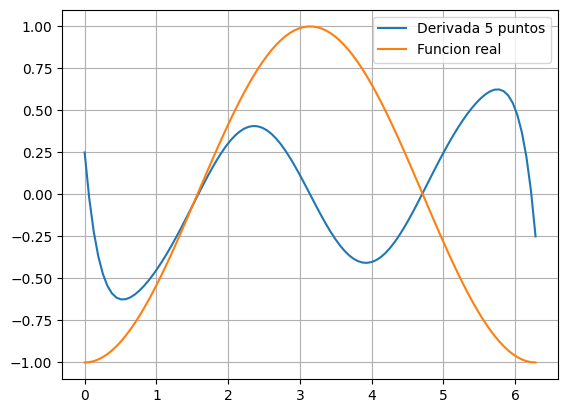

Evaluando la segunda derivada en pi/8: 
Valor real: -0.9238795325112867 
Valor numerico: -0.5951860260116131


In [3]:
x = np.linspace(0,2*np.pi,10)
f = lambda x: np.cos(x)
h = 0.7
f_prime = five_point_derivative(f,x,h)
f_2_prime = five_point_derivative(f,f_prime,h)
f_2_prime_interpolate = BarycentricInterpolator(x,f_2_prime)
x_plot = np.linspace(0,2*np.pi,100)

plt.plot(x_plot,f_2_prime_interpolate(x_plot), label = 'Derivada 5 puntos')
plt.plot(x_plot,-np.cos(x_plot),label = 'Funcion real')
plt.legend()
plt.grid()
plt.show()

print(f'Evaluando la segunda derivada en pi/8: \nValor real: {-np.cos(np.pi/8)} \nValor numerico: {f_2_prime_interpolate(np.pi/8)}')

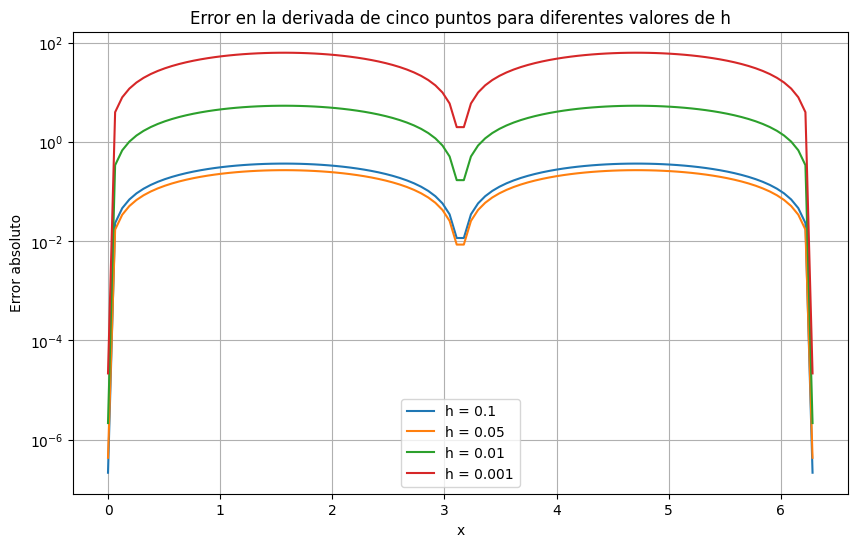

In [4]:
plt.figure(figsize=(10, 6))
h_valores = [0.1, 0.05, 0.01, 0.001]
df_exact = lambda x: -np.sin(x)

for h in h_valores:
    numerical_derivative = five_point_derivative(f, x_plot, h)
    error = np.abs(numerical_derivative - df_exact(x_plot))
    plt.plot(x_plot, error, label=f'h = {h}')

plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.title('Error en la derivada de cinco puntos para diferentes valores de h')
plt.legend()
plt.grid()
plt.show()

Cuando se hace el h demasiado grande o demasiado pequeño el error tiende a aumentar, lo preferible es tomar un h pequeño pero no demasiado. El valor encontrado que mejor aproxima al valor real de la función fue h = 0.7

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `sympy` y `numpy.gradient`
*   ¿Cuál será el valor óptimo de $h$?

In [54]:
f_e = lambda x: x*np.exp(x)
x_e = np.linspace(1.8,2.2,6)
f_e_prime = five_point_derivative(f_e,x_e,h)
f_e_2_prime = five_point_derivative(f_e,f_e_prime,h)
f_e_prime_interpolate = BarycentricInterpolator(x_e,f_e_prime)
f_e_2_prime_interpolate = BarycentricInterpolator(x_e,f_e_2_prime)
x_eval = 2

print(f'Cada derivada evaluada en {x_eval} es: \nPrimera derivada: {f_e_prime_interpolate(x_eval)}\nSegunda derivada: {f_e_2_prime_interpolate(x_eval)}')

Cada derivada evaluada en 2 es: 
Primera derivada: 17.733726688828163
Segunda derivada: 14858744373.030874


In [71]:
#Sympy
y = sp.symbols('y')
f_e_simbolica = y*sp.exp(y)
f_e_simbolica_prime = sp.diff(f_e_simbolica,y,1)
f_e_prime_func = sp.lambdify(y,f_e_simbolica_prime)

valores_sp = f_e_prime_func(x_e) #array de los valores de la derivada en x_e

In [73]:
#Numpy
f_e_vals = f_e(x_e) #array con los valores para usar np.gradient()
f_e_derivada_n = np.gradient(f_e_vals)

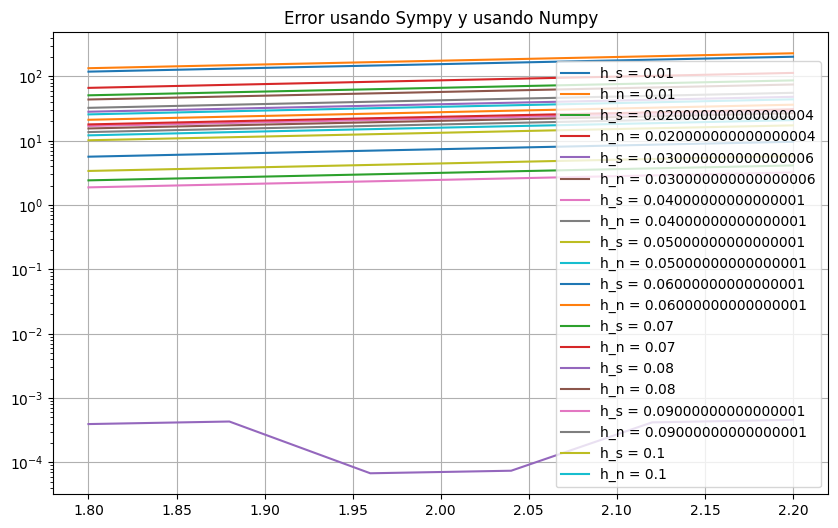

En la gráfica se observa que el menor error se encuentra cuando se usa un h = 0.08


In [135]:
#error, calculo de la derivada variando el h
h_e = np.linspace(0.01,0.1,10)
plt.figure(figsize=(10, 6))

for h in h_e:
    numerical_derivative = five_point_derivative(f_e, x_e, h)
    error_s = np.abs(numerical_derivative - valores_sp)
    error_n = np.abs(numerical_derivative - f_e_derivada_n)
    plt.plot(x_e, error_s, label=f'h_s = {h}')
    plt.plot(x_e, error_n, label=f'h_n = {h}')

plt.grid()
plt.title('Error usando Sympy y usando Numpy')
plt.legend()
plt.yscale('log')
plt.show()

print('En la gráfica se observa que el menor error se encuentra cuando se usa un h = 0.08')

#3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Compare de nuevo para $f'(2)$ y encuentre los errores.

In [142]:
def diferencias_finitas(f, x, h):
  derivada = np.zeros_like(x)
  n = len(x)

  for i in range(n):
    if i == 0:
      derivada[i] = (f(x[i] + h) - f(x[i])) / h

    if i == n:
      derivada[i] = (f(x[i]) - f(x[i] - h)) / h

    else:
      derivada[i] = (f(x[i] + h) - f(x[i] - h)) / (2 * h)

  return derivada

In [50]:
def derivada_3_puntos(f, x, h):
    n = len(x)  # Número de puntos
    derivative = np.zeros_like(x)  # Array para almacenar las derivadas

    for i in range(n):
        if i == 0:
            # Derivada adelantada para el primer punto
            derivative[i] = (-3 * f(x[i]) + 4 * f(x[i] + h) - f(x[i] + 2 * h)) / (2 * h)
        elif i == n - 1:
            # Derivada atrasada para el último punto
            derivative[i] = (3 * f(x[i]) - 4 * f(x[i] - h) + f(x[i] - 2 * h)) / (2 * h)
        else:
            # Derivada centrada para los puntos intermedios
            derivative[i] = (f(x[i] + h) - f(x[i] - h)) / (2 * h)

    return derivative

In [153]:
f_e = lambda x: x*np.exp(x)
x_e = np.linspace(1.8,2.2,6)
h_bueno = 0.08

f_e_prime_finitas = diferencias_finitas(f_e,x_e,h_bueno)
f_e_prime_3p = derivada_3_puntos(f_e,x_e,h_bueno)
f_e_prime_5p = five_point_derivative(f_e,x_e,h_bueno)

print(f'Los valores de f´(2) son: \nDiferencias finitas: {f_e_prime_finitas[3]}\nDerivada 3 puntos: {f_e_prime_3p[3]}\nDerivada 5 puntos: {f_e_prime_5p[3]}')

Los valores de f´(2) son: 
Diferencias finitas: 23.420815163693188
Derivada 3 puntos: 23.420815163693188
Derivada 5 puntos: 23.379377970512028


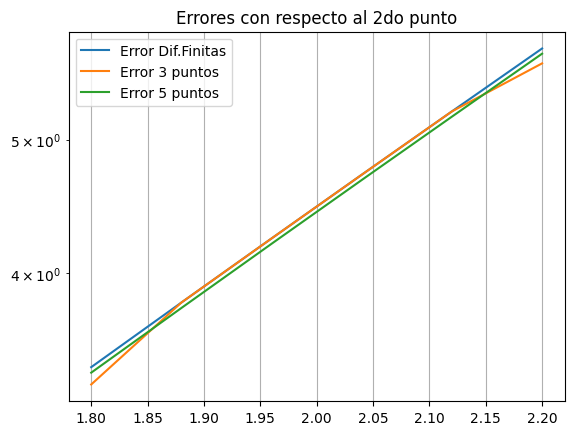

In [158]:
#error
error_finitas = np.abs(f_e_prime_finitas - f_e_prime)
error_3p = np.abs(f_e_prime_3p - f_e_prime)
error_5p = np.abs(f_e_prime_5p - f_e_prime)

plt.plot(x_e,error_finitas,label = 'Error Dif.Finitas')
plt.plot(x_e,error_3p,label = 'Error 3 puntos')
plt.plot(x_e,error_5p,label = 'Error 5 puntos')
plt.title('Errores con respecto al 2do punto')
plt.grid()
plt.legend()
plt.yscale('log')
plt.show()